In [1]:
import pysam
from Bio import SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
samfile = pysam.AlignmentFile("test_sorted.bam", "rb")
genome = next(SeqIO.parse("MG1655-K12.first10K.fasta", "fasta")).seq

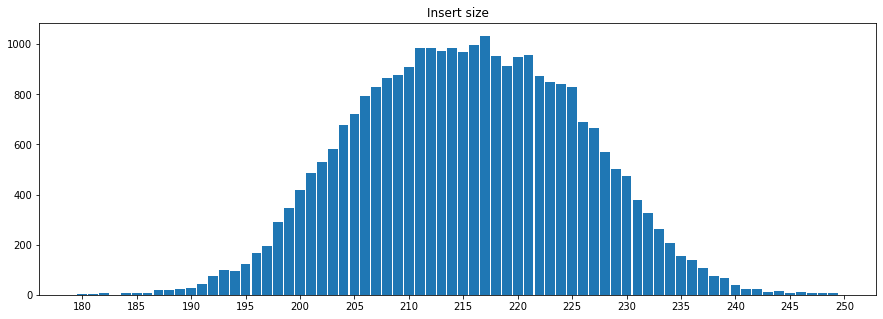

mean=215.29, std=10.59, quantile=[196. 234.]


In [4]:
# insert size
insert = np.loadtxt("insert.txt", dtype=np.int64)
plt.figure(figsize=(15, 5))
h = plt.hist(insert, bins=range(180, 251, 1), range=(180, 250), align='left', rwidth=0.9)
plt.xticks(range(180, 251, 5), range(180, 251, 5))
plt.title("Insert size")
plt.show()

print(f'mean={round(np.mean(insert), 2)}, std={round(np.std(insert), 2)}, quantile={np.quantile(insert, [0.025, 0.975])}')

In [5]:

for x in samfile.pileup('gi|49175990|ref|NC_000913.2|'):
    #help(x)
    break

    A  C   G   T
A   0  0   0   0
C  12  0  11   0
G   8  2   0  11
T   1  0  27   0
mean_read_error=0.00143%


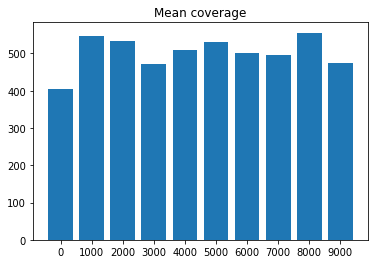

mean_cov=502.3, breadth_cov=1.0


In [68]:
cov = np.zeros(shape=(len(genome)))
SNP = pd.DataFrame(0, index=['A', 'C', 'G', 'T'], columns=['A', 'C', 'G', 'T'])
#print(cov)
#print(SNP)

for i, x in enumerate(samfile.pileup('gi|49175990|ref|NC_000913.2|')):
    pos = x.reference_pos
    cov[i] = x.get_num_aligned()
    gen = genome[pos].upper()
    for j in x.get_query_sequences():
        if j.upper() != gen:
            SNP.loc[j.upper(), gen] += 1

print(SNP)
total = sum(cov)
print(f'mean_read_error={round(SNP.values.sum()/total*100, 5)}%')

covs = [np.mean(cov[i:i+1000]) for i in range(0, len(cov), 1000)]
plt.bar(range(len(covs)), height=covs)
plt.xticks(range(len(covs)), range(0, len(cov), 1000))
plt.title("Mean coverage")
plt.show()
print(f'mean_cov={round(np.mean(cov), 2)}, breadth_cov={np.count_nonzero(cov)/len(cov)}')

# Датасет №1

#### bwa index MG1655-K12.fasta

#### bwa mem -t 6 MG1655-K12.fasta 100x.1.fastq.gz 100x.2.fastq.gz > 100x.sam

#### samtools flagstat 100x.sam 

4991553 + 0 mapped (99.82% : N/A)

#### samtools view -@ 6 -b 100x.sam > 100x.bam && samtools sort -@ 6 100x.bam > 100x_sorted.bam && samtools index -@ 6 100x_sorted.bam

Only properly paired primary alignments
#### samtools view -f 2 -F 0x800 100x.sam | awk '$8!="*" && $9>0' | cut -f9 > 100x_insert.txt


========== Датасет №1 ==========


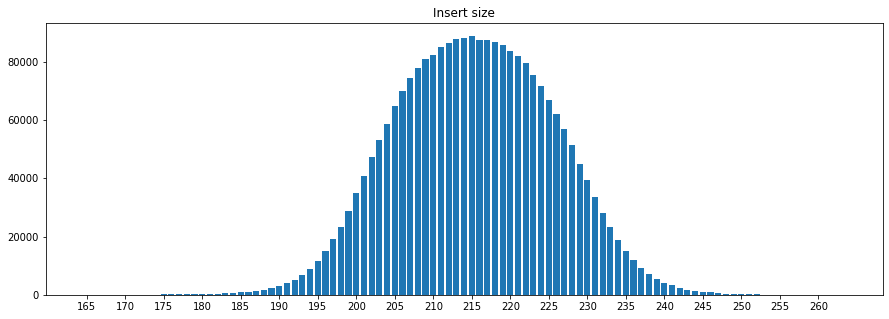

mean=215.38, std=10.22, quantile=[196. 235.]
        A      C      G       T
A       0  43485  30230   16444
C  142241      0  30400   57949
G   57918  30002      0  141909
T   16646  30566  43469       0
mean_read_error=0.14175%


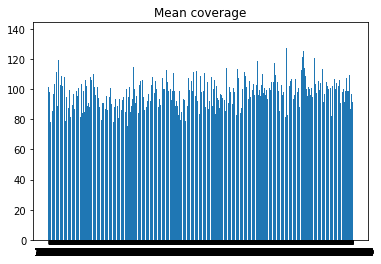

mean_cov=97.5, breadth_cov=0.9999987068059724


In [81]:
print("========== Датасет №1 ==========")


samfile = pysam.AlignmentFile("100x_sorted.bam", "rb")
genome = next(SeqIO.parse("MG1655-K12.fasta", "fasta")).seq

# insert size
insert = np.loadtxt("100x_insert.txt", dtype=np.int64)
plt.figure(figsize=(15, 5))
tmp = int(np.mean(insert))
h = plt.hist(insert, align='left', rwidth=0.8, bins=range(tmp-50, tmp+50), range=(tmp-50, tmp+50))
plt.xticks(range(tmp-50, tmp+50, 5), range(tmp-50, tmp+50, 5))
plt.title("Insert size")
plt.show()

print(f'mean={round(np.mean(insert), 2)}, std={round(np.std(insert), 2)}, quantile={np.quantile(insert, [0.025, 0.975])}')

# coverage & errors
cov = np.zeros(shape=(len(genome)))
SNP = pd.DataFrame(0, index=['A', 'C', 'G', 'T'], columns=['A', 'C', 'G', 'T'])
#print(cov)
#print(SNP)

for i, x in enumerate(samfile.pileup('gi|49175990|ref|NC_000913.2|')):
    pos = x.reference_pos
    cov[i] = x.get_num_aligned()
    gen = genome[pos].upper()
    for j in x.get_query_sequences():
        if j.upper() not in ['A', 'C', 'G', 'T']:
            continue
        if j.upper() != gen:
            SNP.loc[j.upper(), gen] += 1

print(SNP)
total = sum(cov)
print(f'mean_read_error={round(SNP.values.sum()/total*100, 5)}%')

covs = [np.mean(cov[i:i+1000]) for i in range(0, len(cov), 1000)]
plt.bar(range(len(covs)), height=covs)
plt.xticks(range(len(covs)), range(0, len(cov), 1000))
plt.title("Mean coverage")
plt.show()
print(f'mean_cov={round(np.mean(cov), 2)}, breadth_cov={np.count_nonzero(cov)/len(cov)}')

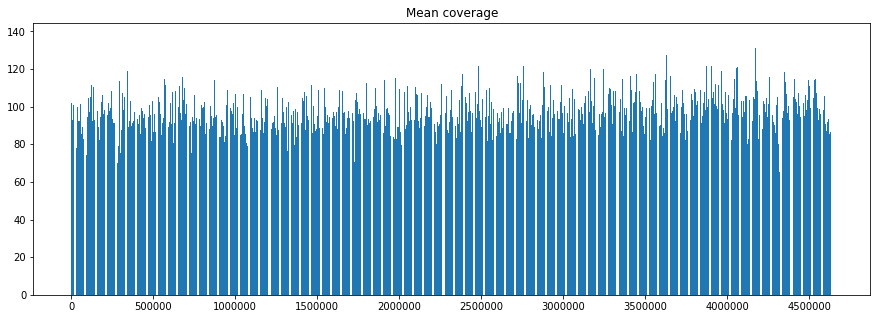

In [84]:
plt.figure(figsize=(15, 5))
plt.bar(range(len(covs)), height=covs)
plt.xticks(range(0, len(covs), 500), range(0, len(cov), 500000))
plt.title("Mean coverage")
plt.show()

# Датасет №2

#### bwa index MG1655-K12.fasta

#### bwa mem -t 6 MG1655-K12.fasta ecoli_mda_lane1_left.downsampled.fastq.gz ecoli_mda_lane1_right.downsampled.fastq.gz > ecoli.sam

####  samtools flagstat ecoli.sam

5706877 + 0 mapped (97.23% : N/A)

#### samtools view -@ 6 -b ecoli.sam > ecoli.bam && samtools sort -@ 6 ecoli.bam > ecoli_sorted.bam && samtools index -@ 6 ecoli_sorted.bam

Only properly paired primary alignments
#### samtools view -f 2 -F 0x800 ecoli.sam | awk '$8!="*" && $9>0' | cut -f9 > ecoli_insert.txt

========== Датасет №2 ==========


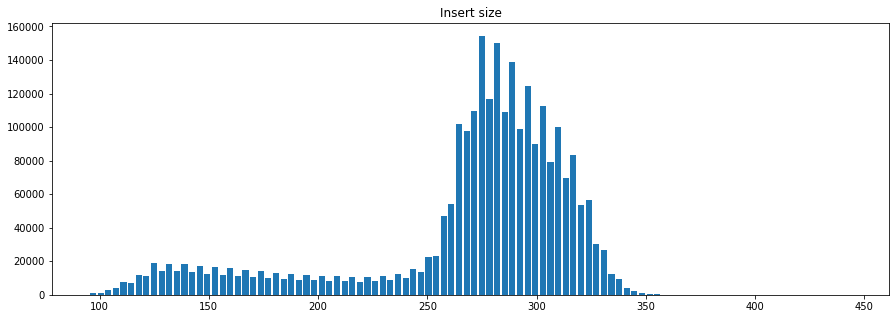

mean=269.73, std=52.21, quantile=[128. 330.]
        A       C       G       T
A       0  247847  153665  150374
C  525547       0  196808  335121
G  329640  192539       0  513756
T  148182  154515  243726       0
mean_read_error=0.64884%


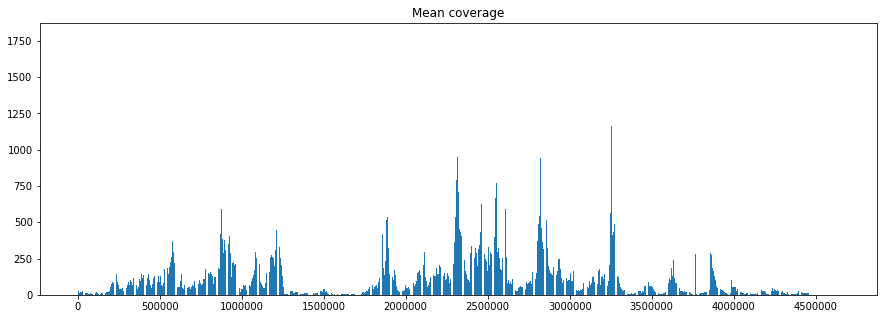

mean_cov=106.02, breadth_cov=0.961363888634441


In [87]:
print("========== Датасет №2 ==========")


samfile = pysam.AlignmentFile("ecoli_sorted.bam", "rb")
genome = next(SeqIO.parse("MG1655-K12.fasta", "fasta")).seq

# insert size
insert = np.loadtxt("ecoli_insert.txt", dtype=np.int64)
plt.figure(figsize=(15, 5))
tmp = int(np.mean(insert))
h = plt.hist(insert, align='left', rwidth=0.8, bins = 100)#bins=range(tmp-100, tmp+100), range=(tmp-100, tmp+100))
#plt.xticks(range(tmp-100, tmp+100, 10), range(tmp-100, tmp+100, 10))
plt.title("Insert size")
plt.show()

print(f'mean={round(np.mean(insert), 2)}, std={round(np.std(insert), 2)}, quantile={np.quantile(insert, [0.025, 0.975])}')

# coverage & errors
cov = np.zeros(shape=(len(genome)))
SNP = pd.DataFrame(0, index=['A', 'C', 'G', 'T'], columns=['A', 'C', 'G', 'T'])
#print(cov)
#print(SNP)

for i, x in enumerate(samfile.pileup('gi|49175990|ref|NC_000913.2|')):
    pos = x.reference_pos
    cov[i] = x.get_num_aligned()
    gen = genome[pos].upper()
    for j in x.get_query_sequences():
        if j.upper() not in ['A', 'C', 'G', 'T']:
            continue
        if j.upper() != gen:
            SNP.loc[j.upper(), gen] += 1

print(SNP)
total = sum(cov)
print(f'mean_read_error={round(SNP.values.sum()/total*100, 5)}%')

covs = [np.mean(cov[i:i+1000]) for i in range(0, len(cov), 1000)]
plt.figure(figsize=(15, 5))
plt.bar(range(len(covs)), height=covs)
plt.xticks(range(0, len(covs), 500), range(0, len(cov), 500000))
plt.title("Mean coverage")
plt.show()
print(f'mean_cov={round(np.mean(cov), 2)}, breadth_cov={np.count_nonzero(cov)/len(cov)}')

# IonTorrent reads

#### bwa index DH10B-K12.fasta

#### bwa mem DH10B-K12.fasta B22-730.fastq.gz > B22-730.sam

#### samtools flagstat B22-730.sam

489459 + 0 mapped (98.41% : N/A)

#### samtools view -@ 6 -b B22-730.sam > B22-730.bam && samtools sort -@ 6 B22-730.bam > B22-730_sorted.bam && samtools index -@ 6 B22-730_sorted.bam

In [ ]:
print("========== IonTorrent B22-730.fastq.gz  ==========")


samfile = pysam.AlignmentFile("part2/B22-730_sorted.bam", "rb")
genome = next(SeqIO.parse("part2/DH10B-K12.fasta", "fasta")).seq


# coverage & errors
cov = np.zeros(shape=(len(genome)))
SNP = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])
quals = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])

#print(cov)
#print(SNP)

delta = 0
indels = Counter() # length -> count
homopoly = 0

for i, x in enumerate(samfile.pileup('gi|170079663|ref|NC_010473.1|', fastafile=pysam.FastaFile('part2/DH10B-K12.fasta'))):
    pos = x.reference_pos
    cov[i] = x.get_num_aligned()
    gen = genome[pos].upper()
    for base, q, name, pos in zip(x.get_query_sequences(add_indels=True), 
                                x.get_query_qualities(), x.get_query_names(), x.get_query_positions()):
        j = base[0]
        if j.upper() != gen:
            if j == '*':
                quals.loc[gen, '-'] += q
            else:
                SNP.loc[j.upper(), gen] += 1
                quals.loc[j.upper(), gen] += q
        INS = True
        if len(base) > 1:
            if base[1] == '-':
                INS = False
            num = ""
            for ind in base[2:]:
                if ind in "0123456789":
                    num += ind
                else:
                    break
            num = int(num)
            indels[num] += 1
            
            if gen == genome[pos-1].upper() or gen == genome[pos+1].upper() or \
            len(base[len(base)-num:]) > 1 and base[len(base)-num:][0] == base[len(base)-num:][1]:
                homopoly += num
            for ind in base[len(base)-num:]:
                if INS:
                    SNP.loc['-', ind.upper()] += 1
                else:
                    SNP.loc[ind.upper(), '-'] += 1


print("Number of substitutions:")
print(SNP)
total = sum(cov)
print(f'mean_read_error={round(SNP.iloc[:4, :].values.sum()/total*100, 5)}%')
print("Quality of wrong bases")
print(quals / SNP)


covs = [np.mean(cov[i:i+1000]) for i in range(0, len(cov), 1000)]
plt.figure(figsize=(15, 5))
plt.bar(range(len(covs)), height=covs)
plt.xticks(range(0, len(covs), 500), range(0, len(cov), 500000))
plt.title("Mean coverage")
plt.show()
print(f'mean_cov={round(np.mean(cov), 2)}, breadth_cov={np.count_nonzero(cov)/len(cov)}')

print('Indel stats')
for k, v in sorted(indels.items()):
    print(f'{v} indels of length {k}')
    
print(f'Indels near homopolymers: {round(homopoly/sum(indels.values())*100)}%')

========== IonTorrent B22-730.fastq.gz  ==========


# IonTorrent C24-698.fastq.gz

#### bwa index DH10B-K12.fasta

#### bwa mem -t 6 DH10B-K12.fasta C24-698.fastq.gz > C24-698.sam

#### samtools flagstat C24-698.sam

682638 + 0 mapped (99.41% : N/A)

#### samtools view -@ 6 -b C24-698.sam > C24-698.bam && samtools sort -@ 6 C24-698.bam > C24-698_sorted.bam && samtools index -@ 6 C24-698_sorted.bam

========== IonTorrent C24-698.fastq.gz  ==========
Number of substitutions:
       A      C      G      T      -
A      0   3285  10013   3507  30081
C   2584      0   2198  18394  73218
G  18508   2187      0   2675  73568
T   3503  10079   3462      0  30781
-  61832  33778  33329  62746      0
mean_read_error=0.17215%
Quality of wrong bases
           A          C          G          T         -
A        NaN  20.487367  25.588235  19.939549  2.643828
C  19.821207        NaN  18.558690  26.840437  3.490590
G  26.861519  18.760860        NaN  19.761121  3.441850
T  19.876677  25.460462  20.450029        NaN  2.535070
-   0.000000   0.000000   0.000000   0.000000       NaN


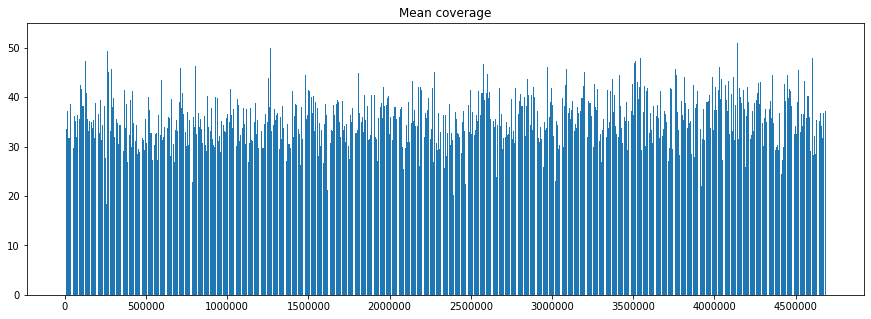

mean_cov=35.7, breadth_cov=1.0
Indel stats
373161 indels of length 1
10614 indels of length 2
795 indels of length 3
156 indels of length 4
62 indels of length 5
41 indels of length 6
45 indels of length 7
19 indels of length 8
19 indels of length 9
13 indels of length 10
11 indels of length 11
8 indels of length 12
5 indels of length 13
8 indels of length 14
3 indels of length 15
3 indels of length 16
4 indels of length 17
2 indels of length 18
1 indels of length 20
Indels near homopolymers: 45%


In [176]:
print("========== IonTorrent C24-698.fastq.gz  ==========")


samfile = pysam.AlignmentFile("part2/C24-698_sorted.bam", "rb")
genome = next(SeqIO.parse("part2/DH10B-K12.fasta", "fasta")).seq


# coverage & errors
cov = np.zeros(shape=(len(genome)))
SNP = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])
quals = pd.DataFrame(0, index=['A', 'C', 'G', 'T', '-'], columns=['A', 'C', 'G', 'T', '-'])

#print(cov)
#print(SNP)

delta = 0
indels = Counter() # length -> count
homopoly = 0

for i, x in enumerate(samfile.pileup('gi|170079663|ref|NC_010473.1|', fastafile=pysam.FastaFile('part2/DH10B-K12.fasta'))):
    pos = x.reference_pos
    cov[i] = x.nsegments
    gen = genome[pos].upper()
    for base, q, name, pos in zip(x.get_query_sequences(add_indels=True), 
                                x.get_query_qualities(), x.get_query_names(), x.get_query_positions()):
        j = base[0]
        if j.upper() != gen:
            if j == '*':
                quals.loc[gen, '-'] += q
            else:
                SNP.loc[j.upper(), gen] += 1
                quals.loc[j.upper(), gen] += q
        INS = True
        if len(base) > 1:
            if base[1] == '-':
                INS = False
            num = ""
            for ind in base[2:]:
                if ind in "0123456789":
                    num += ind
                else:
                    break
            num = int(num)
            indels[num] += 1
            
            if gen == genome[pos-1].upper() or gen == genome[pos+1].upper() or \
            len(base[len(base)-num:]) > 1 and base[len(base)-num:][0] == base[len(base)-num:][1]:
                homopoly += num
            for ind in base[len(base)-num:]:
                if INS:
                    SNP.loc['-', ind.upper()] += 1
                else:
                    SNP.loc[ind.upper(), '-'] += 1

print("Number of substitutions:")
print(SNP)
total = sum(cov)
print(f'mean_read_error={round(SNP.iloc[:4, :].values.sum()/total*100, 5)}%')
print("Quality of wrong bases")
print(quals / SNP)


covs = [np.mean(cov[i:i+1000]) for i in range(0, len(cov), 1000)]
plt.figure(figsize=(15, 5))
plt.bar(range(len(covs)), height=covs)
plt.xticks(range(0, len(covs), 500), range(0, len(cov), 500000))
plt.title("Mean coverage")
plt.show()
print(f'mean_cov={round(np.mean(cov), 2)}, breadth_cov={np.count_nonzero(cov)/len(cov)}')

print('Indel stats')
for k, v in sorted(indels.items()):
    print(f'{v} indels of length {k}')
    
print(f'Indels near homopolymers: {round(homopoly/sum(indels.values())*100)}%')

In [32]:
quals = np.array([[np.nan, 20.487367, 25.588235, 19.939549, 2.643828],
[19.821207, np.nan, 18.558690, 26.840437, 3.490590],
[26.861519, 18.760860, np.nan, 19.761121, 3.441850],
[19.876677, 25.460462, 20.450029, np.nan, 2.535070]])

quals = pd.DataFrame(quals, index=["A", "C", "G", "T"], columns=["A", "C", "G", "T", "-"])

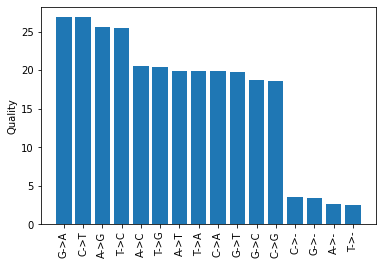

In [33]:
vals = dict()
for a, data in quals.iterrows():
    for b, value in data.items():
        if not np.isnan(value):
            vals[a+"->"+b]=value

xs = [i[0] for i in sorted(vals.items(), key=lambda x:x[1], reverse=True)]
ys = [i[1] for i in sorted(vals.items(), key=lambda x:x[1], reverse=True)]
plt.bar(range(len(xs)), ys)
plt.xticks(range(len(xs)), xs, rotation='vertical')
plt.ylabel("Quality")
plt.show()